In [55]:
# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generating Synthetic data for 100 trials

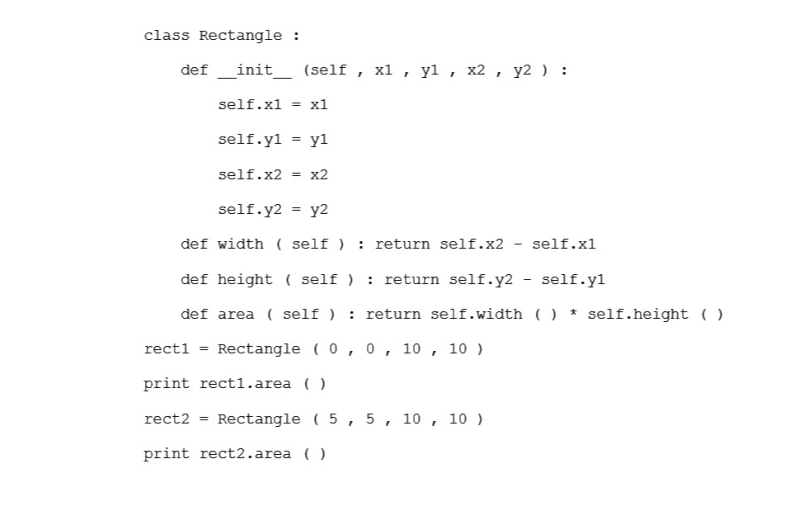

In [56]:
# just showing you the image of the text we will be using to generate fixations over

from IPython.display import Image

img = Image(filename='code_snippet.png')
img

In [57]:
# Importing all the required stuff
import emip_toolkit as EMTK
import correction
import json
import os
import numpy as np
import drift_algorithms_osf as algo
import algorithms as best_algs
from tqdm import tqdm
import statistics
# Importing the correction_mode_of_disparities function from the ModeOfDisparities folder and the __init__.py file
from Algorithms.ModeOfDisparities import correction_mode_of_disparities

In [58]:
# Helper functions
def mean_error_group(results):
    new_list = []
    
    for result in results:
        new_list.append(statistics.mean(result))
        
    return new_list

In [59]:
# generate areas of interest around each word, we will see a visualization of this in a second

image_path = "./"
image = "code_snippet.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")
aoi

/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)


,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,142.5,27,50,20,code_snippet.png
1,sub-line,line 1 part 2,197.5,27,88,20,code_snippet.png
2,sub-line,line 1 part 3,292.5,27,9,20,code_snippet.png
3,sub-line,line 2 part 1,178.5,61,33,22,code_snippet.png
4,sub-line,line 2 part 2,214.5,61,81,22,code_snippet.png
...,...,...,...,...,...,...,...
89,sub-line,line 12 part 12,475.5,410,10,21,code_snippet.png
90,sub-line,line 13 part 1,141.5,444,51,22,code_snippet.png
91,sub-line,line 13 part 2,197.5,444,97,22,code_snippet.png
92,sub-line,line 13 part 3,302.5,444,9,22,code_snippet.png


In [60]:
# we add the actual word associated with each area of interest (AOI)

file_path = "./"

aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()

/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1262: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for location in aois_raw["name"].iteritems():


,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,142.5,27,50,20,code_snippet.png,class
1,sub-line,line 1 part 2,197.5,27,88,20,code_snippet.png,Rectangle
2,sub-line,line 1 part 3,292.5,27,9,20,code_snippet.png,:
3,sub-line,line 2 part 1,178.5,61,33,22,code_snippet.png,def
4,sub-line,line 2 part 2,214.5,61,81,22,code_snippet.png,__init__


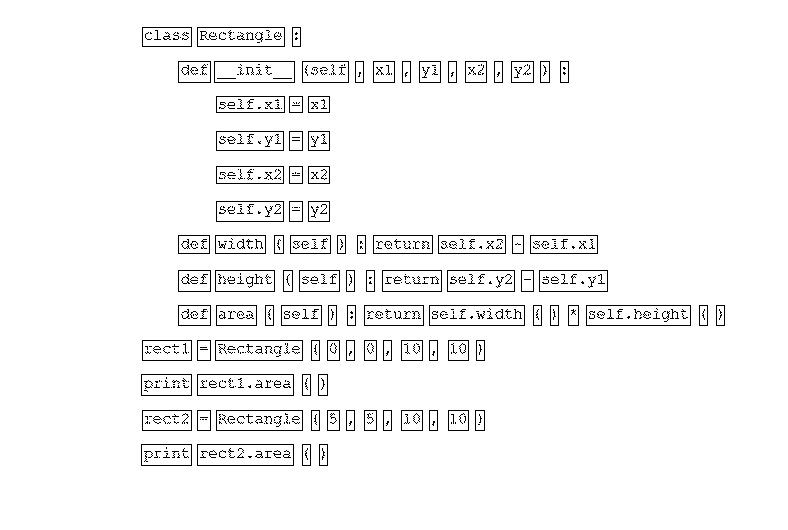

In [61]:
# finally, a visualization of the areas of interest (AOIs) around words!

EMTK.draw_aoi(aoi, image, image_path)

[[240.5, 104.5, 350], [158.16666666666666, 28.0, 250], [455.5, 77.0, 100], [332.5, 239.5, 50], [383.5, 236.5, 300], [449.5, 64.0, 100], [236.5, 76.0, 400], [548.1666666666666, 246.5, 350], [549.8333333333334, 70.0, 100], [563.1666666666666, 244.5, 350], [307.8333333333333, 182.0, 100], [562.1666666666666, 322.5, 50], [240.16666666666666, 219.5, 350], [237.16666666666666, 165.0, 350], [473.1666666666667, 272.0, 350], [548.1666666666666, 240.5, 350], [315.8333333333333, 166.0, 100], [571.1666666666666, 306.5, 50], [235.16666666666666, 219.5, 350], [236.16666666666666, 183.0, 350], [465.1666666666667, 285.0, 350], [183.5, 321.5, 150], [232.5, 70.0, 400], [192.16666666666666, 352.5, 50], [159.16666666666666, 27.0, 250], [302.1666666666667, 107.5, 50], [236.83333333333334, 36.0, 450], [537.8333333333334, 67.0, 100], [233.83333333333334, 30.0, 450], [549.8333333333334, 62.0, 100], [382.8333333333333, 77.0, 50], [222.83333333333334, 30.0, 450], [161.16666666666666, 423.5, 250], [555.166666666

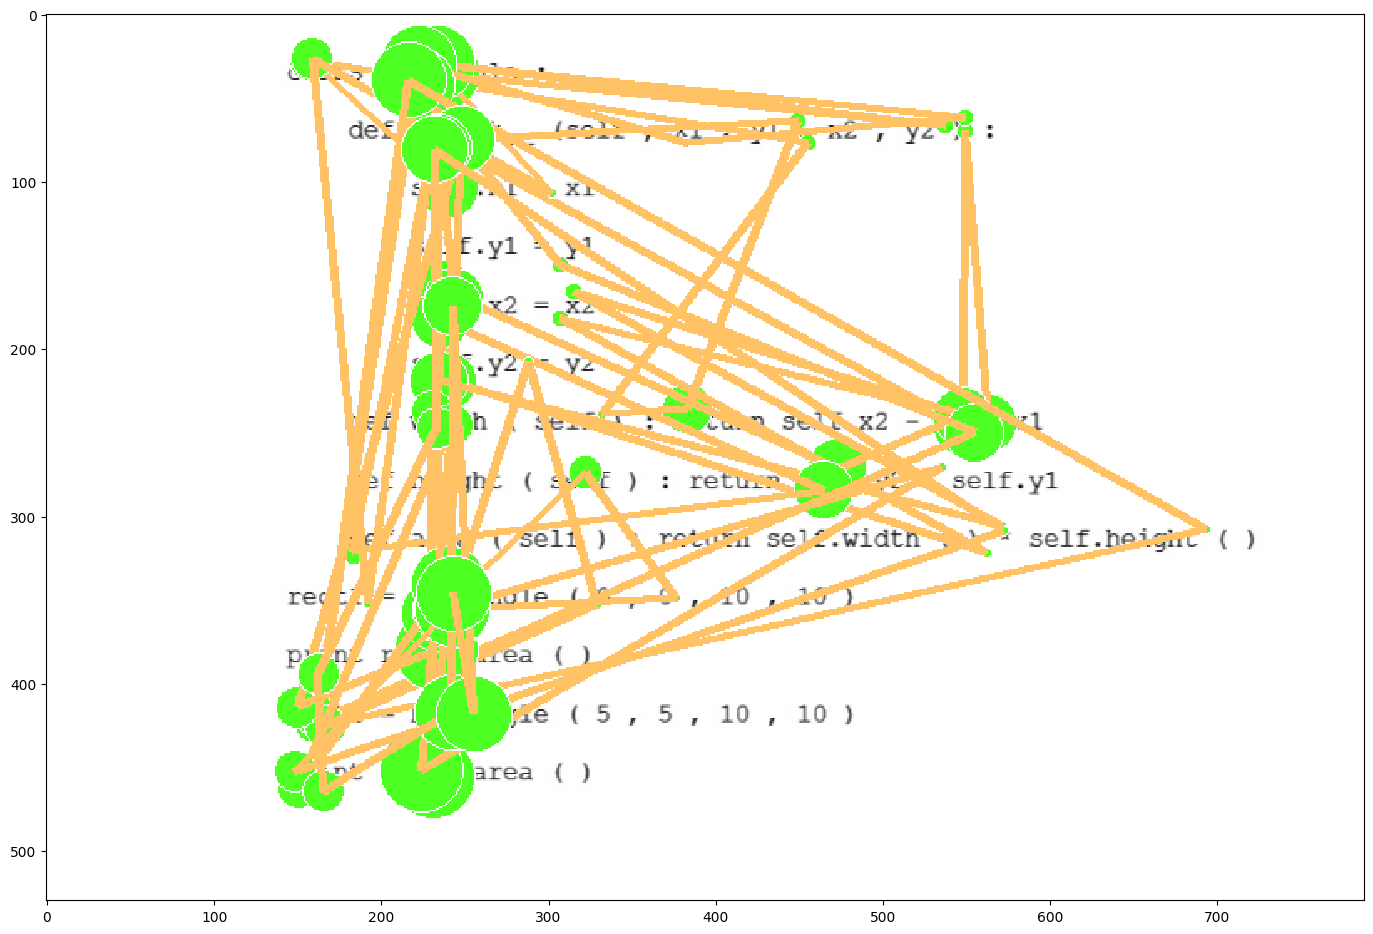

In [62]:
# generating a synthetic trial
synth_fixations = correction.generate_fixations_code(aois_with_tokens)
print(synth_fixations)

# drawing the synthetic data!
correction.draw_fixation('code_snippet.png', synth_fixations)

# Generating a synthetic dataset with 100 readers:

In [63]:
data = {}

# loop 100 times maintaining a variable called index
for index in range(100):

    # generate a synthetic trial using similar code to the one above
    
    synth_fixations = correction.generate_fixations_code(aois_with_tokens)
    # store the trial in the dictionary called "data" where the key is "robot" + str(index)
    data["robot" + str(index)] = synth_fixations
    

In [64]:
# check that the data looks correct

data["robot1"]

[[294.1666666666667, 215.5, 50],
 [313.5, 451.0, 50],
 [459.5, 62.0, 100],
 [158.5, 380.0, 250],
 [152.16666666666666, 415.5, 250],
 [209.16666666666666, 423.5, 50],
 [227.5, 272.0, 300],
 [235.83333333333334, 39.0, 450],
 [198.5, 81.0, 150],
 [364.8333333333333, 428.5, 50],
 [231.5, 275.0, 300],
 [254.83333333333334, 351.5, 450],
 [232.16666666666666, 306.5, 200],
 [389.5, 245.5, 300],
 [471.5, 308.5, 500],
 [556.5, 278.0, 350],
 [317.8333333333333, 208.5, 100],
 [151.16666666666666, 425.5, 250],
 [234.83333333333334, 340.5, 450],
 [388.5, 237.5, 300],
 [335.5, 239.5, 50],
 [236.83333333333334, 347.5, 450],
 [194.16666666666666, 421.5, 50],
 [230.16666666666666, 317.5, 200],
 [393.5, 250.5, 300],
 [471.5, 316.5, 500],
 [557.5, 288.0, 350],
 [165.16666666666666, 419.5, 250],
 [395.5, 76.0, 100],
 [245.5, 79.0, 400],
 [254.5, 412.5, 450],
 [193.16666666666666, 346.5, 50],
 [456.1666666666667, 253.5, 350],
 [284.1666666666667, 100.5, 50],
 [248.83333333333334, 347.5, 450],
 [248.83333333

In [65]:
# convert data into json format, then store it in a text file called "synthetic_dataset_with_time.txt"

# Check if the file already exists
# If it does, skip this step
if not os.path.exists("synthetic_dataset_with_time.txt"):
    # Open a file for writing
    synthetic_dataset_with_time = open("synthetic_dataset_with_time.txt", "w")

    # Save the dictionary into this file
    # (the 'indent=4' is optional, but makes the json file more readable)
    json.dump(data, synthetic_dataset_with_time, indent=4)

    # Close the file
    synthetic_dataset_with_time.close()

    # check that the file looks correct
    synthetic_dataset_with_time = open("synthetic_dataset_with_time.txt", "r")

    print(synthetic_dataset_with_time.read())



# GENERATING ERRORS

In [37]:
# open the generated synthetic data file and read it as a python dictionary called data

import json

file = open('synthetic_dataset_with_time.txt', 'r')
text = file.read()
data = json.loads(text)

In [66]:
import emip_toolkit as EMTK

# find areas of interest (AOIs) once again
image_path = "./"
image = "code_snippet.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")


# add tokens to AOIs 
file_path = "./"
aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()


import correction

# find the y coordinate of each line in the text
line_ys = correction.find_lines_Y(aoi)

/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)


In [67]:
synth = correction.generate_fixations_code(aois_with_tokens)

# Universal Function for comparing algorithm statistics for different kinds of errors

In [68]:
# Creating a function out of all the code below
def synthetic_error_analysis(error_type, iterations):

    # create empty lists to store results
    attach_results = [[],[],[],[],[],[],[],[],[],[],[]]
    regress_results = [[],[],[],[],[],[],[],[],[],[],[]]
    warp_results = [[],[],[],[],[],[],[],[],[],[],[]]
    cluster_results = [[],[],[],[],[],[],[],[],[],[],[]]
    compare_results = [[],[],[],[],[],[],[],[],[],[],[]]
    merge_results = [[],[],[],[],[],[],[],[],[],[],[]]
    segment_results = [[],[],[],[],[],[],[],[],[],[],[]]
    split_results = [[],[],[],[],[],[],[],[],[],[],[]]
    stretch_results = [[],[],[],[],[],[],[],[],[],[],[]]
    compare_fix_num_results = [[],[],[],[],[],[],[],[],[],[],[]]
    compare_line_length_results = [[],[],[],[],[],[],[],[],[],[],[]]
    fix_align_results = [[],[],[],[],[],[],[],[],[],[],[]]
    mode_of_disparities_results = [[],[],[],[],[],[],[],[],[],[],[]]
    #hill_climb_results = [[],[],[],[],[],[],[],[],[],[],[]]

    file = open('synthetic_dataset_with_time.txt', 'r')
    text = file.read()
    data = json.loads(text)

    word_centers = correction.find_word_centers(aoi)
    word_centers = np.array(word_centers.copy(), dtype=int)

    duration_word_centers = correction.find_word_centers_and_duration(aois_with_tokens)
    duration_word_centers = np.array(duration_word_centers.copy(), dtype=int)

    image_path = "./"
    image = "code_snippet.png"
    aoi_words = EMTK.find_aoi(image, image_path, level="sub-line")
    aoi_lines = EMTK.find_aoi(image, image_path, level="line")

    # Creating a sample lsit to store an array of an array of words where each index represents a line
    words_sorted_by_line = []

    for i in range(len(aoi_lines)):
        words_sorted_by_line.append([])

    # Looping through the words and appending them to the correct line
    for i in range(len(aoi_words)):
        word_line_number = int(aoi_words.at[i, 'name'].strip().split(' ')[1])
        # Appending the x and y coordinates of the word to the correct line
        words_sorted_by_line[word_line_number-1].append([aoi_words.at[i, 'x'], aoi_words.at[i, 'y']])


    # MAKE SURE YOU RUN THIS 100 TIMES, NOT JUST ONE!!!
    for robot_index in tqdm(range(iterations)):
        
        for error_probability in range(0, 11):
            error_test = []
            # generate error based on the error type
            if error_type == "noise":
                error_test = correction.error_noise(error_probability/10, 30, error_probability/10, data['robot' + str(robot_index)].copy())
            elif error_type == "slope":
                slope = slope = -0.125 + (error_probability * 0.025)
                error_test = correction.error_slope(slope, data['robot' + str(robot_index)].copy())
            elif error_type == "shift":
                shift = -0.25 + error_probability * 0.05
                error_test = correction.error_shift(shift, data['robot' + str(robot_index)].copy(), aoi_lines)
            elif error_type == "within_line_regression":
                error_test, data['robot' + str(robot_index)] = correction.error_within_line_regression(error_probability/10, data['robot' + str(robot_index)].copy(), words_sorted_by_line, aoi_lines)
            elif error_type == "between_line_regression":
                error_test = correction.error_between_line_reg(error_probability/10, data['robot' + str(robot_index)].copy())
            elif error_type == "offset":
                error_test = correction.error_offset(error_probability/10, error_probability/10, data['robot' + str(robot_index)].copy())
                
            
            # hill_climbing correction - 5
            np_array = np.array(error_test.copy())
            '''
            clusters = best_algs.make_cluster_refactor(np.array(synth))
            print("HIIIIII", clusters)
            corrections = best_algs.correct_cluster(clusters, aois_with_tokens)
            print("DONE", corrections)
        
            percentage, match_list = correction.correction_quality(aoi, synth_fixations, corrections)
            hill_climb_results[error_probability].append(percentage)
            '''
            
            # attach correction - 1
            np_array = np.array(error_test.copy())
            attach_correction = algo.attach(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), attach_correction)
            attach_results[error_probability].append(percentage)
            
            # regress correction - 3
            np_array = np.array(error_test.copy())
            regress_correction = algo.regress(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), regress_correction)
            regress_results[error_probability].append(percentage)
            
            # warp correction - 4
            np_array = np.array(error_test.copy(), dtype=int)
            durations = np.delete(np_array, 0, 1)
            durations = np.delete(durations, 0, 1)
            np_array = np.delete(np_array, 2, 1)
            
            warp_correction = algo.warp(np_array, word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), warp_correction)
            warp_results[error_probability].append(percentage)

            if percentage < 1:
                # correction.draw_correction('synthetic_text.png', warp_correction, match_list)
                print("robot:", robot_index, "    error probability:", error_probability)

            # cluster correction - 5
            np_array = np.array(error_test.copy())
            cluster_correction = algo.cluster(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), cluster_correction)
            cluster_results[error_probability].append(percentage)

            # compare correction - 6 
            np_array = np.array(error_test.copy())
            compare_correction = algo.compare(np_array, duration_word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), compare_correction)
            compare_results[error_probability].append(percentage)

            # merge correction - 7
            np_array = np.array(error_test.copy())
            merge_correction = algo.merge(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), merge_correction)
            merge_results[error_probability].append(percentage)

            # segment correction - 8
            np_array = np.array(error_test.copy())
            segment_correction = algo.segment(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), segment_correction)
            segment_results[error_probability].append(percentage)

            # split correction - 9
            np_array = np.array(error_test.copy())
            split_correction = algo.split(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), split_correction)
            split_results[error_probability].append(percentage)

            # stretch correction - 10
            np_array = np.array(error_test.copy())
            stretch_correction = algo.stretch(np_array, line_ys)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), stretch_correction)
            stretch_results[error_probability].append(percentage)

            # compare by fixation number - 11
            np_array = np.array(error_test.copy())
            compare_fix_number_correction = algo.compare_fixnum(np_array, duration_word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), compare_fix_number_correction)
            compare_fix_num_results[error_probability].append(percentage)

            # Compare by line length - 12
            np_array = np.array(error_test.copy())
            compare_line_length_correction = algo.compare_line_len(np_array, duration_word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), compare_line_length_correction)
            compare_line_length_results[error_probability].append(percentage)

            # Fix align - 13
            np_array = np.array(error_test.copy())
            fix_align_correction = algo.fix_align(np_array, duration_word_centers)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), fix_align_correction)
            fix_align_results[error_probability].append(percentage)

            # Mode of disparities - 14
            np_array = np.array(error_test.copy())
            mode_of_disparities_correction = correction_mode_of_disparities(np_array, aoi_words)
            percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), mode_of_disparities_correction)
            mode_of_disparities_results[error_probability].append(percentage)

            # Warp with regression - 15
            # np_array = np.array(error_test.copy())
            # warp_correction, data['robot' + str(robot_index)] = algo.warp_with_regression(error_test.copy(), word_centers, words_sorted_by_line, aoi_lines, data['robot' + str(robot_index)].copy())
            # percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), warp_correction)
            # warp_with_regression_results[error_probability].append(percentage)

    mean_attach_results = mean_error_group(attach_results)
    mean_regress_results = mean_error_group(regress_results)
    mean_warp_results = mean_error_group(warp_results)
    mean_cluster_results = mean_error_group(cluster_results)
    mean_compare_results = mean_error_group(compare_results)
    mean_merge_results = mean_error_group(merge_results)
    mean_segment_results = mean_error_group(segment_results)
    mean_split_results = mean_error_group(split_results)
    mean_stretch_results = mean_error_group(stretch_results)
    mean_compare_fix_num_results = mean_error_group(compare_fix_num_results)
    mean_compare_line_length_results = mean_error_group(compare_line_length_results)
    mean_fix_align_results = mean_error_group(fix_align_results)
    mean_mode_of_disparities_results = mean_error_group(mode_of_disparities_results)

    import matplotlib.pyplot as plt
    plt.plot(mean_attach_results, color='Black', linewidth=1, marker='^')
    plt.plot(mean_regress_results, color='Aqua', linewidth=1, marker='s')
    plt.plot(mean_warp_results, color='DarkViolet', linewidth=1, marker='d')
    plt.plot(mean_cluster_results, color='DarkOrange', linewidth=1, marker='p')
    plt.plot(mean_compare_results, color='DarkGreen', linewidth=1, marker='h')
    plt.plot(mean_merge_results, color='DarkRed', linewidth=1, marker='*')
    plt.plot(mean_segment_results, color='DarkBlue', linewidth=1, marker='x')
    plt.plot(mean_split_results, color='DarkCyan', linewidth=1, marker='1')
    plt.plot(mean_stretch_results, color='DarkMagenta', linewidth=1, marker='2')
    plt.plot(mean_compare_fix_num_results, color='DarkGoldenRod', linewidth=1, marker='3')
    plt.plot(mean_compare_line_length_results, color='DarkSlateGray', linewidth=1, marker='4')
    plt.plot(mean_fix_align_results, color='DarkSlateBlue', linewidth=1, marker='5')
    plt.plot(mean_mode_of_disparities_results, color='DarkSlateGrey', linewidth=1, marker='6')

    plt.legend(['attach', 'regress', 'warp', 'cluster', 'compare', 'merge', 'segment', 'split', 'stretch', 'compare_fix_num', 'compare_line_length', 'fix_align', 'mode_of_disparities'], loc='lower right')
    plt.ylabel('Accuracy of algorithmic correction (%))')
    plt.xlabel(error_type + ' distortion')

    print(error_type + " Error Statistics:")
    print("mean attach:", statistics.mean(mean_attach_results))
    print("mean regress:", statistics.mean(mean_regress_results))
    print("mean warp:", statistics.mean(mean_warp_results))
    print("mean cluster:", statistics.mean(mean_cluster_results))
    print("mean compare:", statistics.mean(mean_compare_results))
    print("mean merge:", statistics.mean(mean_merge_results))
    print("mean segment:", statistics.mean(mean_segment_results))
    print("mean split:", statistics.mean(mean_split_results))
    print("mean stretch:", statistics.mean(mean_stretch_results))
    print("mean compare fix num:", statistics.mean(mean_compare_fix_num_results))
    print("mean compare line length:", statistics.mean(mean_compare_line_length_results))
    print("mean fix align:", statistics.mean(mean_fix_align_results))
    print("mean mode of disparities:", statistics.mean(mean_mode_of_disparities_results))

    x_ticks_labels = ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
    plt.xticks(range(0, 11), x_ticks_labels)
    #plt.savefig("noise_comparison.png")
    plt.show()

        
        # print("mean fix align:", statistics.mean(mean_fix_align_results))
        # print("mean mode of disparities:", statistics.mean(mean_mode_of_disparities_results))
        # print("mean warp regression:", statistics.mean(mean_warp_regression_results))



# OFFSET ERROR

[[294.1666666666667, 242.5, 3], [313.5, 478.0, 40], [459.5, 88.0, 72], [158.5, 370.0, 11], [152.16666666666666, 399.5, 392], [209.16666666666666, 411.5, 21], [227.5, 296.0, 27], [235.83333333333334, 21.0, 505], [198.5, 106.0, 167], [364.8333333333333, 398.5, 90], [231.5, 290.0, 277], [254.83333333333334, 379.5, 458], [232.16666666666666, 283.5, 228], [389.5, 225.5, 362], [471.5, 335.5, 791], [556.5, 307.0, 654], [317.8333333333333, 190.5, 186], [151.16666666666666, 410.5, 174], [234.83333333333334, 348.5, 170], [388.5, 247.5, 441], [335.5, 231.5, 76], [236.83333333333334, 377.5, 502], [194.16666666666666, 420.5, 90], [230.16666666666666, 313.5, 322], [393.5, 225.5, 58], [471.5, 321.5, 833], [557.5, 271.0, 579], [165.16666666666666, 414.5, 450], [395.5, 70.0, 100], [245.5, 107.0, 530], [254.5, 409.5, 244], [193.16666666666666, 334.5, 99], [456.1666666666667, 268.5, 476], [284.1666666666667, 103.5, 73], [248.83333333333334, 324.5, 449], [248.83333333333334, 372.5, 846], [231.833333333333

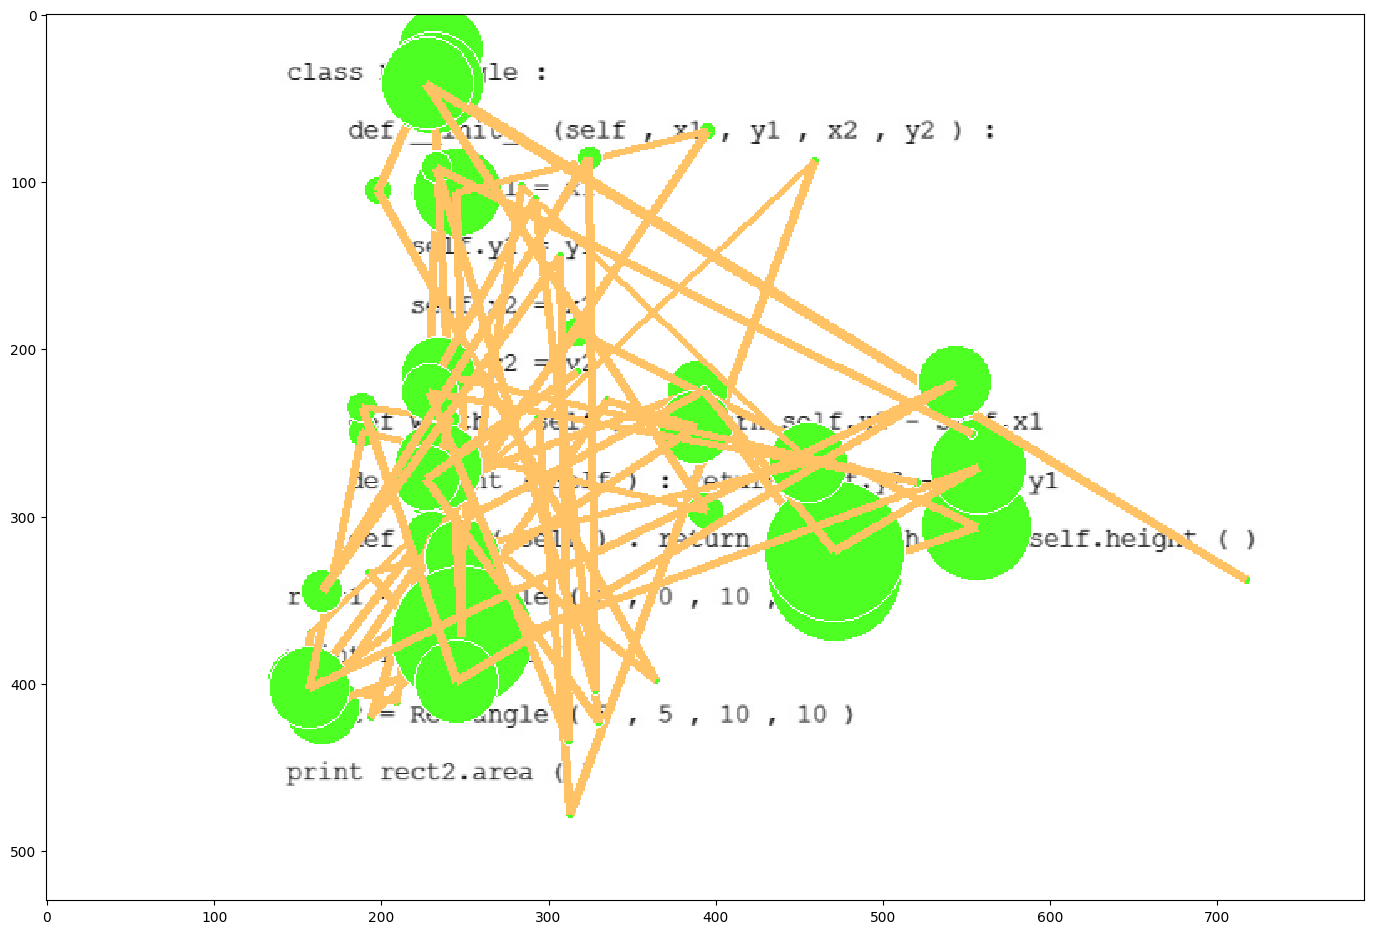

In [69]:
# generate noise over the correct trial

error_test = correction.error_offset(0.1, 0.1, data['robot1'].copy())
print(error_test)

# draw the trial with added error
correction.draw_fixation('code_snippet.png', error_test)

/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)


robot: 0     error probability: 0


/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWa

robot: 0     error probability: 1


/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWa

robot: 0     error probability: 2


/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWa

robot: 0     error probability: 3


/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWa

robot: 0     error probability: 4


/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWa

robot: 0     error probability: 5


/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWa

robot: 0     error probability: 6


/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWa

robot: 0     error probability: 7


/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWa

robot: 0     error probability: 8


/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWa

robot: 0     error probability: 9


/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWa

robot: 0     error probability: 10


/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
/var/folders/nn/7dg3frxj7110d9z8g5flwtj80000gn/T/ipykernel_12327/2972505790.py:120: RankWa

noise Error Statistics:
mean attach: 0.7945454545454546
mean regress: 0.7890909090909091
mean warp: 0.08
mean cluster: 0.46
mean compare: 0.16
mean merge: 0.43636363636363634
mean segment: 0.12
mean split: 0.39090909090909093
mean stretch: 0.8
mean compare fix num: 0.06
mean compare line length: 0.15636363636363637


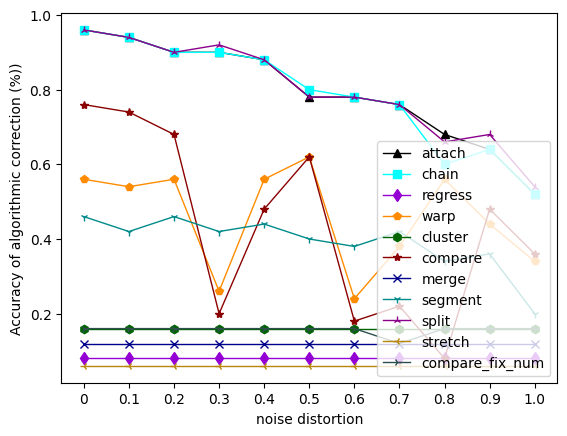

100%|██████████| 1/1 [01:03<00:00, 63.01s/it]


In [70]:
# Running the function
synthetic_error_analysis("offset", 1)